# Welcome to my Data Preprocessing notebook
## Content
1. [Handling Missing Data](#null-bullet) done
2. [Handling Duplicates](#second-bullet) done
3. [Handling Incorrect Data Types](#third-bullet) done
4. [Handling Outliers](#fourth-bullet) done
5. [Handling Inconsistent Data](#fifth-bullet) done
6. [Feature Scaling and Normalization](#sixth-bullet) done
7. [Handling Categorical Variables](#seventh-bullet) done
8. [Handling String Data](#eighth-bullet) done
9. [Data Binning](#ninth-bullet) done
10. [Feature Engineering](#tenth-bullet) done
11. [Handling Data Encoding Issues](#eleventh-bullet) done
12. [Data Aggregation and Grouping](#twelfth-bullet) done
13. [Reshaping Data](#thirteenth-bullet) done
14. [Handling Multicollinearity](#fourteenth-bullet)
15. [Handling Date and Time Data](#fifteenth-bullet) done
16. [Data Merging and Joining](#sixteenth-bullet)
17. [Dealing with Sparse Data](#seventeenth-bullet) done
18. [Type Casting](#eighteenth-bullet) done

### First loading the dataset (for this task we are using the titatnic dataset (https://www.kaggle.com/c/titanic/data)

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [90]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values.shape}")


Unique values in 'PassengerId': (891,)
Unique values in 'Survived': (2,)
Unique values in 'Pclass': (3,)
Unique values in 'Name': (891,)
Unique values in 'Sex': (2,)
Unique values in 'Age': (88,)
Unique values in 'SibSp': (7,)
Unique values in 'Parch': (7,)
Unique values in 'Ticket': (681,)
Unique values in 'Fare': (248,)
Unique values in 'Cabin': (148,)
Unique values in 'Embarked': (3,)


## Handling Missing Data <a class="anchor" id="null-bullet"></a>

In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Remove Missing Data
When to Use: When the percentage of missing data is very low, or if certain rows/columns with missing values aren't critical for your analysis.



In [13]:
# df.dropna(subset=['Embarked'], axis=0, inplace=True) # Drops rows with missing values from the embarked col

In [15]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [119]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [19]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

#### Mean is generally used for normally distributed data (skewness near 0).

- Pros: Simple and easy to implement.
- Cons: Can introduce bias if there are many outliers or if the distribution of the data is not normal.

#### Median Imputation is Used when the data contains outliers (e.g., a few very young or very old passengers) that could skew the mean.
- Pros: Robust to outliers.
- Cons: May not reflect subtle variations in the data.
#### Mode Imputation If there are certain age groups that dominate the data (like a majority of passengers falling into a particular age group). This is rarely used for continuous variables like age but can be used if your data has repeating values.


In [21]:
df['Age'].skew()

0.38910778230082704

In [68]:
# Calculate IQR
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]

# Display outliers
print(outliers)
print(outliers.shape)

     PassengerId  Survived  Pclass                                  Name  \
33            34         0       2                 Wheadon, Mr. Edward H   
54            55         0       1        Ostby, Mr. Engelhart Cornelius   
96            97         0       1             Goldschmidt, Mr. George B   
116          117         0       3                  Connors, Mr. Patrick   
280          281         0       3                      Duane, Mr. Frank   
456          457         0       1             Millet, Mr. Francis Davis   
493          494         0       1               Artagaveytia, Mr. Ramon   
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   
672          673         0       2           Mitchell, Mr. Henry Michael   
745          746         0       1          Crosby, Capt. Edward Gifford   
851          852         0       3                   Svensson, Mr. Johan   

      Sex   Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
33   male  66.0    

In [25]:
df['Age'].mean()

29.69911764705882

In [27]:
df['Age'].median()

28.0

In [29]:
df['Age'].mode()

0    24.0
Name: Age, dtype: float64

In [50]:
df['Age_median'] = df['Age'].fillna(df['Age'].median())

In [52]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_rand         0
Age_median       0
dtype: int64

#### Random Imputation within a Distribution
When to Use: To maintain the variability in the dataset rather than just imputing a single value for all missing entries.
- Pros: Preserves the variability of the data.
- Cons: Adds randomness and can introduce noise.

In [44]:
import numpy as np
df['Age_rand'] = df['Age'].apply(lambda x: np.random.choice(df['Age'].dropna()) if np.isnan(x) else x)

In [59]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          676
Embarked         2
Age_rand         0
Age_median       0
dtype: int64

In [48]:
df['Age_rand'].mean()

29.70482603815937

In [54]:
df['Age_median'].mean()

29.36158249158249

In [17]:
df = df.drop(['Age_rand', 'Age_median'], axis=1)

In [16]:
import numpy as np
# finally i think random to keep variability for 177 entry
df['Age'] = df['Age'].apply(lambda x: np.random.choice(df['Age'].dropna()) if np.isnan(x) else x)

In [39]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

#### Frequent Categorical Imputation
   - replace NaN with frequent categorim
 If cabin assignment followed some common pattern, and you want to use the most frequent value. This works if you’re trying to maintain consistency but don’t have much to go on.

In [47]:
freq = df['Cabin'].value_counts().index[0]
freq

'B96 B98'

In [49]:
df['Cabin_Freq'] = df['Cabin'].fillna(freq)

In [10]:
df['Deck'] = df['Cabin'].str[0]
df['Deck'].fillna('Unknown')
# will have fewer categories to deal with (e.g., A, B, C, etc., or "Unknown"), which may help reduce the impact of the missing data.

0      Unknown
1            C
2      Unknown
3            C
4      Unknown
        ...   
886    Unknown
887          B
888    Unknown
889          C
890    Unknown
Name: Deck, Length: 891, dtype: object

In [12]:
most_frequent_deck = df['Deck'].mode()[0]
df['Deck'].fillna(most_frequent_deck)

0      C
1      C
2      C
3      C
4      C
      ..
886    C
887    B
888    C
889    C
890    C
Name: Deck, Length: 891, dtype: object

#### Impute Missing Cabins Based on Ticket

Since some passengers share the same ticket (families or groups), it's possible that these passengers stayed in the same cabin. Therefore, i can fill missing cabins by grouping people with the same ticket number and assigning the cabin known for other passengers with the same ticket:

In [56]:
import numpy as np
df['Cabin'] = df.groupby('Ticket')['Cabin'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

C:\Users\yara.maraey\AppData\Local\Temp\ipykernel_36688\1033144338.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Cabin'] = df.groupby('Ticket')['Cabin'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))


In [27]:
df['Cabin'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Cabin
Non-Null Count  Dtype 
--------------  ----- 
215 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


if some passengers still have missing cabin data, you can impute it based on the most common cabin (or deck) for their class.

#### Replace NaN with Mode

In [52]:
df['Cabin_mode'] = df['Cabin'].fillna(df['Cabin'].mode())

#### Filling with 'Unknown' or 'U'
When to Use: If the cabin number isn’t crucial for my analysis, or if you want to preserve rows but can’t infer anything from other features, it’s common to fill missing values with a placeholder like 'Unknown' or 'U'.

In [131]:
df['Cabin'] = df['Cabin'].fillna('Unknown')

In [59]:
df = df.drop(['Cabin_Freq', 'Cabin_mode'], axis=1)

In [43]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Handling Duplicates <a class="anchor" id="second-bullet"></a>

In [29]:
# Find all duplicated rows (including first occurrence)
duplicates = df[df.duplicated()]
duplicates

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [31]:
df['Name'].duplicated().sum()

0

In [17]:
df['Ticket'].duplicated().sum()

210

In [19]:
df['Cabin'].duplicated().sum()

743

In [ ]:
df.drop_duplicates(inplace=True)

## Handling Incorrect Data Types <a class="anchor" id="third-bullet"></a>

In [11]:
# If categorical variables are stored as strings, you can convert them into categorical data types for memory efficiency and better performance.
df['Embarked'] = df['Embarked'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(2), float64(2), int64(5), object(3)
memory usage: 71.7+ KB


## Handling Outliers <a class="anchor" id="fourth-bullet"></a>

In [71]:
# Calculate IQR
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]

# Display outliers
print(outliers)
print(outliers.shape)

     PassengerId  Survived  Pclass                                  Name  \
33            34         0       2                 Wheadon, Mr. Edward H   
54            55         0       1        Ostby, Mr. Engelhart Cornelius   
96            97         0       1             Goldschmidt, Mr. George B   
116          117         0       3                  Connors, Mr. Patrick   
280          281         0       3                      Duane, Mr. Frank   
456          457         0       1             Millet, Mr. Francis Davis   
493          494         0       1               Artagaveytia, Mr. Ramon   
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   
672          673         0       2           Mitchell, Mr. Henry Michael   
745          746         0       1          Crosby, Capt. Edward Gifford   
851          852         0       3                   Svensson, Mr. Johan   

      Sex   Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
33   male  66.0    

Text(0, 0.5, 'No. of Passengers')

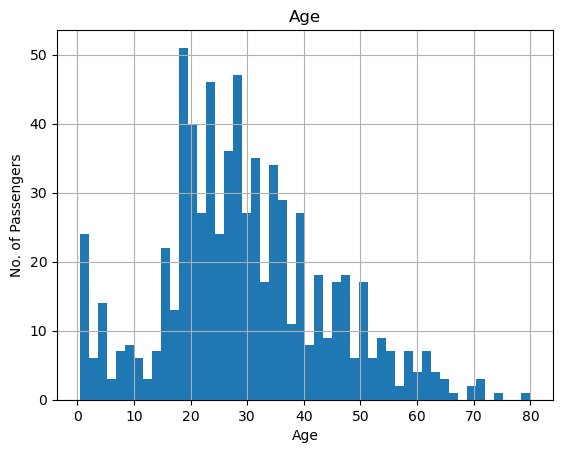

In [73]:
import matplotlib.pyplot as plt
figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No. of Passengers')

In [75]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

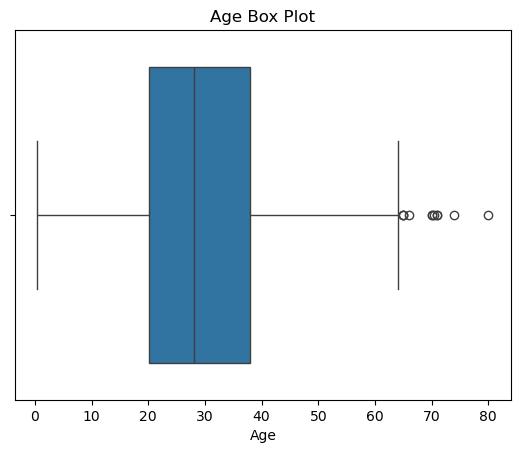

In [77]:
import seaborn as sns
sns.boxplot(x=df['Age'])
plt.title('Age Box Plot')
plt.show()

Text(0, 0.5, 'No. of Passengers')

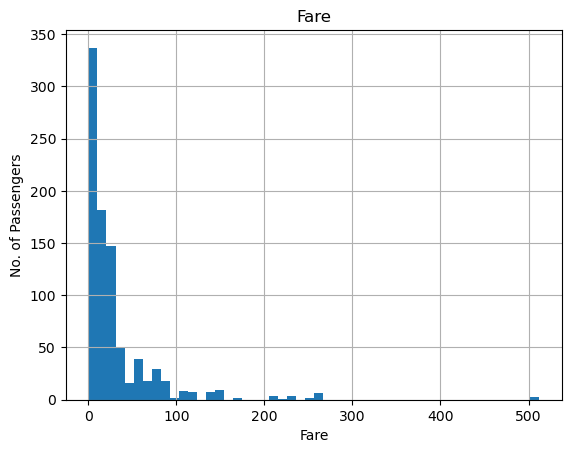

In [79]:
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No. of Passengers')

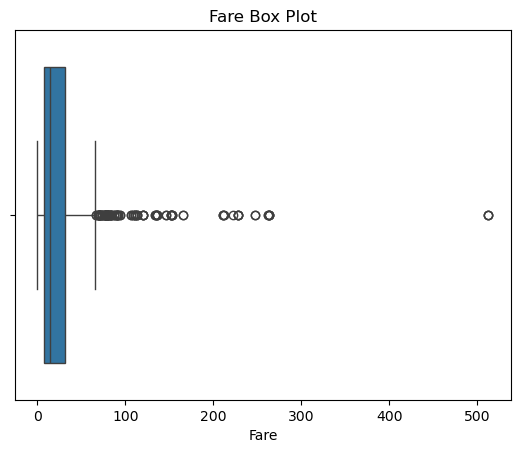

In [81]:
sns.boxplot(x=df['Fare'])
plt.title('Fare Box Plot')
plt.show()

In [83]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [87]:
num_zeros = (df['Fare'] == 0).sum()
num_zeros

15

In [71]:
# Calculate IQR for Fare
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR
print(lower_bound)
print(upper_bound)

# Identify outliers in Fare
outliers_fare = df[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)]
print(outliers_fare.shape)

-61.358399999999996
100.2688
(53, 12)


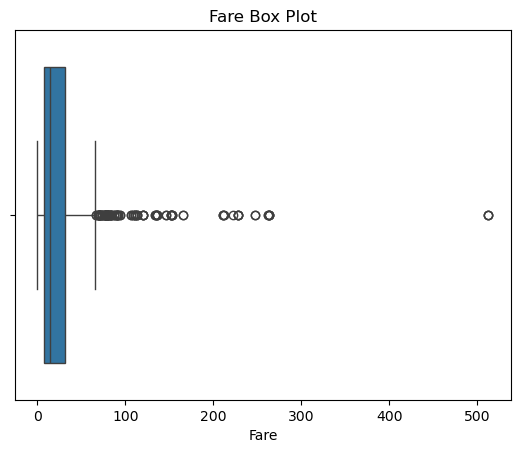

In [89]:
import seaborn as sns
sns.boxplot(x=df['Fare'])
plt.title('Fare Box Plot')
plt.show()

In [91]:
# Remove outliers from Fare
df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

In [1]:
df['Fare_clipped'] = df['Fare'].clip(lower=lower_bound, upper=upper_bound)

NameError: name 'df' is not defined

In [93]:
# Calculate IQR for Fare
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR
print(lower_bound)
print(upper_bound)

# Identify outliers in Fare
outliers_fare = df[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)]
print(outliers_fare.shape)

-46.416799999999995
80.3126
(0, 12)


## Handling Inconsistent Data <a class="anchor" id="fifth-bullet"></a>

In [21]:
# Check for inconsistent values in categorical columns
print(df['Embarked'].value_counts())
print(df['Sex'].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64


In [23]:
df['Sex'] = df['Sex'].str.lower()
df['Embarked'] = df['Embarked'].str.upper()  # You can choose upper/lower as needed

In [25]:
df['Embarked'] = df['Embarked'].replace({
    'C ': 'C',  # Fix any extra spaces
    'SOUTHAMPTON': 'S'  # Fix names with full spelling
})

In [27]:
df['Name'] = df['Name'].str.strip()
df['Cabin'] = df['Cabin'].str.strip() # removing leading and trailing whitespace

## Feature Scaling and Normalization <a class="anchor" id="sixth-bullet"></a>

#### Feature Scaling (Standardization)
Purpose: Ensures that all features contribute equally to distance-based algorithms. It centers the data around 0 and standardizes the range to have a mean of 0 and a standard deviation of 1 and ensures that continuous data appears normally distributed.
- Use when your data features have different units or magnitudes.
If you're using algorithms like SVM, logistic regression, or k-nearest neighbors (k-NN), which can be sensitive to the scale of the input data.
For features where the distribution of the data is approximately normal (Gaussian distribution).

#### Standardization (Z-score normalization)

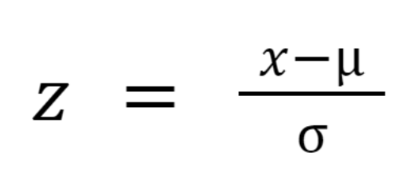
​
- When to Use:

1. When the data has a Gaussian (normal) distribution or when you want all features to contribute equally, regardless of original scale. Works well for algorithms like SVM and linear regression, which assume normally distributed data.

- Why: Maintains feature relationships and makes data more interpretable for algorithms sensitive to the magnitude of differences.


In [98]:
from sklearn.preprocessing import StandardScaler
features = ['Age', 'Fare']
scaler = StandardScaler()
# Fit and transform the selected features
df.loc[:, features] = scaler.fit_transform(df[features]) # Applied to continous features
print(df[features_to_scale].head())

        Age      Fare
0 -0.482211 -0.781444
2 -0.203617 -0.730968
3  0.423220  2.647181
4  0.423220 -0.721621
5       NaN -0.691089


#### Normalization (Min-Max Scaling)
Purpose: Transforms features by scaling each feature to a given range (usually [0, 1]). This is useful when you want all the features to be on the same scale.

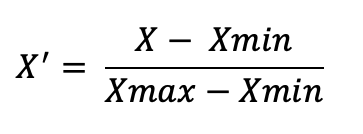

- Use if you're using algorithms that require a bounded input (e.g., neural networks).
  
When you don’t assume a normal distribution of data, and you want to preserve the distribution of the data (since min-max scaling maintains relative distances between data points).

When features have different ranges and need to be scaled equally without affecting outliers too much.


In [101]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()
df.loc[:, features] = scaler.fit_transform(df[features])
print(df[features_to_scale].head())

        Age      Fare
0  0.271174  0.077540
1  0.472229  0.762388
2  0.321438  0.084759
3  0.434531  0.567914
4  0.434531  0.086096


#### MaxAbs Scaling
This scales the data to the range [-1, 1], maintaining the sign of the data values.

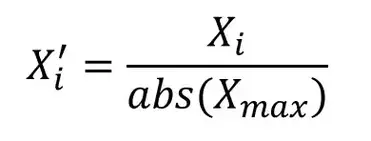

- When to Use:

1. When data has both positive and negative values and you want to preserve this feature.
2. Works well when the data is sparse (lots of zeros) and you don’t want to center it around 0.
- Use Case: Often used for sparse data because it maintains sparse data structure, important in algorithms where sparsity should be preserved, like text classification.

In [97]:
from sklearn.preprocessing import MaxAbsScaler
features = ['Age', 'Fare']
scaler = MaxAbsScaler()
df.loc[:, features] = scaler.fit_transform(df[features])
print(df[features].head())

        Age      Fare
0  0.271174  0.077540
1  0.472229  0.762388
2  0.321438  0.084759
3  0.434531  0.567914
4  0.434531  0.086096


#### Robust Scaler
​
where IQR is the interquartile range (Q3 - Q1).

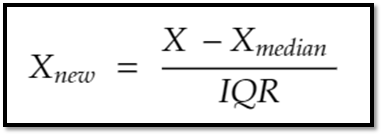

- When to Use:

1. When your data has many outliers.
2. Rather than using the mean and standard deviation (which can be influenced by outliers), it uses the median and IQR.
3. Suitable for algorithms that may not handle outliers well, like linear models or k-Means clustering.

- Use Case: Data that contains outliers, such as income or housing prices, where you want to scale but avoid the impact of extreme values.



In [103]:
from sklearn.preprocessing import RobustScaler

# Initialize RobustScaler
scaler = RobustScaler()
df.loc[:, features] = scaler.fit_transform(df[features])
print(df[features].head())

        Age      Fare
0 -0.117647 -0.290038
1  0.823529  2.939889
2  0.117647 -0.255990
3  0.647059  2.022699
4  0.647059 -0.249685


#### Unit Vector (Normalization)
​
  This scales each feature vector to have a length (or norm) of 1.

- When to Use:

1. When you need to scale a feature vector to a specific length, such as for some optimization problems.
2. Used in text classification or other cases where the direction of the data is more important than the magnitude (e.g., cosine similarity).
- Use Case: Common in text mining or when using cosine similarity in clustering or classification tasks.



In [106]:
from sklearn.preprocessing import Normalizer

# Initialize Normalizer
scaler = Normalizer()
df.loc[:, features] = scaler.fit_transform(df[features])
print(df[features].head())

        Age      Fare
0 -0.375881 -0.926668
1  0.269739  0.962933
2  0.417588 -0.908636
3  0.304688  0.952452
4  0.932951 -0.360004


#### Log Transformation

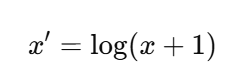

- When to Use:

1. When your data has an exponential distribution (e.g., certain financial data).
2. It can be used to compress large values and expand small values, making the distribution more normal-like.
- Use Case: Especially useful for right-skewed data, such as income or population data and features with high variance 

In [57]:
import numpy as np
features = ['Age', 'Fare']
# Apply log transformation (adding 1 to avoid log(0))
df[features] = np.log1p(df[features])
print(df[features].head())

        Age      Fare
0  3.135494  2.110213
1  3.663562  4.280593
2  3.295837  2.188856
3  3.583519  3.990834
4  3.583519  2.202765


#### L1 and L2 Normalization
L1 Normalization (Least Absolute Deviations) scales data by dividing each value by the sum of absolute values in the dataset. It is sensitive to outliers because it considers absolute values.

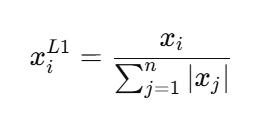

L2 Normalization (Least Squares) scales data by dividing each value by the Euclidean norm (square root of the sum of squared values). It reduces the influence of outliers because squaring small values makes them even smaller.

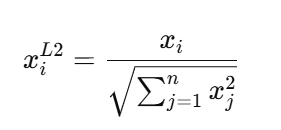

- When to use L1 and L2 Normalization:
 
L1 Normalization is ideal when you have sparse data or want a model robust to individual large feature values, such as in natural language processing or text data with high-dimensional, sparse vectors.

L2 Normalization is generally preferable when you have data with a roughly uniform distribution without extreme outliers, as squaring values penalizes larger differences.

In [20]:
from sklearn.preprocessing import normalize
import pandas as pd

features = ['Fare', 'Age']

# L1 Normalization
df[features] = normalize(df[features], norm='l1', axis=0)

# L2 Normalization
df[features] = normalize(df[features], norm='l2', axis=0)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,0.022105,1,0,A/5 21171,0.004103,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.038182,1,0,PC 17599,0.040344,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0.026124,0,0,STON/O2. 3101282,0.004485,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.035168,1,0,113803,0.030053,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0.035168,0,0,373450,0.004556,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0.027129,0,0,211536,0.007358,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,0.019091,0,0,112053,0.016979,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.030144,1,2,W./C. 6607,0.013272,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,0.026124,0,0,111369,0.016979,C148,C


#### Decimal Scaling
Decimal scaling moves the decimal point of values based on the maximum absolute value in the data. For example, if the maximum value in Fare is 512.3292, we'd shift all values by 3 decimal places to standardize the scale.

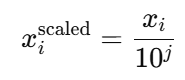

- When to use Decimal Scaling:

When data has a very large range but isn’t skewed. often used in datasets with natural bounds or constraints and when the interpretability of values on a normalized scale is important.

In [ ]:
import numpy as np

# Decimal Scaling for 'Fare' and 'Age'
def decimal_scaling(column):
    max_abs_val = np.max(np.abs(column))
    scaling_factor = 10 ** np.ceil(np.log10(max_abs_val))
    return column / scaling_factor

df['Fare'] = decimal_scaling(df['Fare'])
df['Age'] = decimal_scaling(df['Age'])


#### Power Transformation
Power transformations (e.g., Box-Cox or Yeo-Johnson) aim to make data more Gaussian (normal) and reduce skewness. 

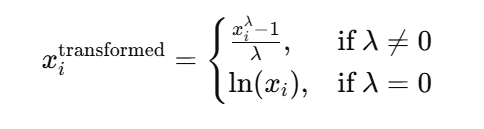

- When to use Power Transformation:

Power transformations are beneficial for features with skewed distributions, like Fare or Age in the Titanic dataset, where some passengers paid significantly higher fares than others.

This transformation helps linear regression, linear discriminant analysis, and other models sensitive to skewness.

In [6]:
from sklearn.preprocessing import PowerTransformer

# Initialize PowerTransformer (method='yeo-johnson' works with non-positive values)
scaler = PowerTransformer(method='yeo-johnson')
df.loc[:, features] = scaler.fit_transform(df[features])
print(df[features].head())

        Age      Fare
0 -0.487080 -0.991127
1  0.624272  1.541572
2 -0.187950 -0.919992
3  0.432234  1.305559
4  0.432234 -0.906989


| Technique                  | When to Use                                      | Why                                                                                  |
|----------------------------|--------------------------------------------------|--------------------------------------------------------------------------------------|
| **Min-Max Scaling**        | Data with a known range, neural networks         | Scales to \[0, 1\], efficient for models needing bounded values                      |
| **Z-score Normalization**  | Gaussian-distributed data, SVM, linear models    | Centers on mean 0, variance 1, makes data comparable in standard deviation units     |
| **Robust Scaling**         | Data with outliers or skewness                   | Reduces outlier impact by centering on median and scaling by IQR                     |
| **Max Abs Scaling**        | Sparse data, text data, or data where zero sparsity matters | Maintains data sparsity while scaling features to unit range            |
| **L1 and L2 Normalization**| Sparse data (L1), unit vector norm (L2)          | Standardizes feature magnitude, useful for distance-based models                     |
| **Decimal Scaling**        | Data with natural scale, interpretable count or financial data | Maintains relative feature differences while fitting within a standard range |
| **Log Transformation**     | Data with right skew, exponential growth (e.g., income) | Reduces skewness, often brings data closer to normal for linear models      |
| **Power Transformation**   | Data requiring normality, Gaussian-based models  | Reduces skewness, stabilizes variance, useful for regression and parametric tests    |


## Handling Categorical Variables <a class="anchor" id="seventh-bullet"></a>

#### Label Encoding
This method assigns a unique integer (label) to each category in a feature. It's simple but can introduce unintended ordinal relationships, which may not be suitable for all algorithms.

+ Simple and efficient for ordinal data (e.g., rankings like ['Low', 'Medium', 'High']).
+ Suitable when the categorical feature has a natural order.

Cons: If used on nominal data (no ordinal relationship), it may cause the model to assume that some categories are larger or more important than others. 

In [137]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df[['Sex']].head()

,Sex
0,1
1,0
2,0
3,0
4,1


In [139]:
le = LabelEncoder()
df['Embarked'] = le.fit_transform(df['Embarked'])
df[['Embarked']].head()

,Embarked
0,2
1,0
2,2
3,2
4,2


#### One-Hot Encoding
This method creates a new binary column for each category in the feature. A value of 1 represents the presence of the category, and 0 indicates absence. It avoids introducing an ordinal relationship between categories.

- Example:
  
For Embarked:
Create new columns: Embarked_C, Embarked_S, Embarked_Q
The value in each column will be either 1 or 0, representing whether the passenger embarked from that port.

- One-Hot Encoding is best for nominal features where there is no order between categories, as it represents each category as a separate binary column.

In [98]:
# Using pandas get_dummies() for one-hot encoding
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
# Check the result
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500   NaN       False        True  
1          PC 17599  71.2833   C85       False       False  
2  STON/O2. 3101282   7.9250   NaN       False        True  
3            113803  53.1000  C123       False      

#### Ordinal Encoding
This method is similar to label encoding but assumes the categories have a specific order or ranking. For example, Pclass in the Titanic dataset has an inherent order: 1st class > 2nd class > 3rd class.
- Use ordinal encoding when the categories have a natural order (e.g., ranks, satisfaction levels).

In [139]:
# Mapping Pclass to ordinal values (already ordinal, but could use mapping)
df['Pclass'] = df['Pclass'].map({1: 1, 2: 2, 3: 3})

#### Target Encoding
This method encodes categorical variables based on the target variable. For each category, the mean of the target variable (e.g., survival rate in a classification problem) is calculated and used to replace the category.
- Target encoding can be useful when the dataset is small, and the categories have a strong correlation with the target.
- However, it can lead to overfitting, so techniques like cross-validation or adding regularization are required.

In [143]:
# Example using target encoding
df['Cabin_encoded'] = df.groupby('Cabin')['Survived'].transform('mean')
print(df[['Cabin', 'Cabin_encoded']].head())

  Cabin  Cabin_encoded
0   NaN            NaN
1   C85            1.0
2   NaN            NaN
3  C123            0.5
4   NaN            NaN


## Handling String Data <a class="anchor" id="eighth-bullet"></a>

Handling string data in the Titanic dataset involves cleaning, transforming, and encoding textual features to make them useful for machine learning models. Several features in the Titanic dataset, like Name, Sex, and Cabin, are string-based and need to be processed. Here are some common methods for handling string data:
#### Text Extraction from Strings
- Some string columns contain complex information that can be useful. You can extract specific parts:

Extracting titles from Name: The Name column contains titles like "Mr.", "Mrs.", etc. These titles can be extracted and used as features.

In [9]:
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)# Extract title from name

In [11]:
df['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

#### Regex for String Matching
Use regular expressions (regex) to clean or extract data from strings.

In [143]:
import re
# Clean 'Cabin' column, for example, extract the deck (first letter of the cabin)
df['Deck'] = df['Cabin'].apply(lambda x: re.search(r'[A-Za-z]', x).group() if pd.notnull(x) else 'U')
df['Deck'].head(10)

0    U
1    C
2    U
3    C
4    U
5    U
6    E
7    U
8    U
9    U
Name: Deck, dtype: object

## Data Binning <a class="anchor" id="ninth-bullet"></a>

Data binning (or discretization) is a technique used to group continuous or categorical values into bins or ranges. This can simplify the analysis, make patterns more evident, and reduce the noise in a dataset. Here's how you can use data binning with examples, including both continuous variables and categorical variables.

- Binning Continuous Variables
When you have a continuous numerical feature, you can bin it into discrete intervals or ranges.

In [26]:
# The Age feature is a continuous variable. We can bin passengers into age groups.
bins = [0, 12, 18, 35, 60, 100]  # Define bin edges
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']  # Define bin labels
df['Age_Bin'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)  # Binning 'Age'
df['Age_Bin'].head(10)

0    Young Adult
1          Adult
2    Young Adult
3          Adult
4          Adult
5            NaN
6          Adult
7          Child
8    Young Adult
9       Teenager
Name: Age_Bin, dtype: category
Categories (5, object): ['Child' < 'Teenager' < 'Young Adult' < 'Adult' < 'Senior']

In [28]:
# Another continuous feature is Fare, which can have a large range. We can bin it into low, medium, and high fare categories.
bins = [0, 50, 100, 500]  # Define bin edges
labels = ['Low Fare', 'Medium Fare', 'High Fare']  # Define bin labels
df['Fare_Bin'] = pd.cut(df['Fare'], bins=bins, labels=labels, right=False)
df['Fare_Bin'].head(10)

0       Low Fare
1    Medium Fare
2       Low Fare
3    Medium Fare
4       Low Fare
5       Low Fare
6    Medium Fare
7       Low Fare
8       Low Fare
9       Low Fare
Name: Fare_Bin, dtype: category
Categories (3, object): ['Low Fare' < 'Medium Fare' < 'High Fare']

- Equal-Frequency Binning (Quantile Binning)
This divides the data into bins such that each bin contains approximately the same number of data points. For example, splitting the Fare feature into quartiles:

In [33]:
df['Fare_Bin_Quantile'] = pd.qcut(df['Fare'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
df['Fare_Bin_Quantile'].head(10)

0    Q1
1    Q4
2    Q2
3    Q4
4    Q2
5    Q2
6    Q4
7    Q3
8    Q2
9    Q3
Name: Fare_Bin_Quantile, dtype: category
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

## Feature Engineering <a class="anchor" id="tenth-bullet"></a>
Feature engineering is the process of creating new features or transforming existing ones to improve the performance of machine learning models.

- Combining Features
  
You can create new features by combining existing ones to represent relationships between different variables.

In [40]:
# combine SibSp (siblings/spouses aboard) and Parch (parents/children aboard) to create a FamilySize feature,
# which indicates the total number of family members on board, including the passenger.
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # Add 1 to include the passenger themselves

In [42]:
df['FamilySize'].head()

0    2
1    2
2    1
3    2
4    1
Name: FamilySize, dtype: int64

- Creating Boolean Features

Sometimes, you can create binary (Boolean) features based on the presence or absence of certain values.

In [45]:
# Example: IsAlone Feature
# You can create a new feature to identify passengers who are traveling alone by checking if their FamilySize is 1.
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)  # 1 if alone, 0 if not
df['IsAlone'].tail(10)

881    1
882    1
883    1
884    1
885    0
886    1
887    1
888    0
889    1
890    1
Name: IsAlone, dtype: int32

## Handling Data Encoding Issues <a class="anchor" id="eleventh-bullet"></a>

#### Common Encodings:
- UTF-8: Widely used, supports all Unicode characters.
- ISO-8859-1 (Latin-1): Common in Western Europe, used in many older systems.
- ASCII: Basic character set, but doesn’t support characters like é, ü, etc.

In [ ]:
# Load Titanic dataset using the detected or known encoding
df = pd.read_csv('titanic.csv', encoding='ISO-8859-1')  # Or 'utf-8', 'latin1', etc.


- Convert the Encoding
If the dataset is already loaded but you notice encoding issues (e.g., special characters appear as "�"), you can convert the text columns to the correct encoding. Here’s how you can re-encode text columns:

In [ ]:
df['Name'] = df['Name'].str.encode('ISO-8859-1').str.decode('utf-8')

## Data Aggregation and Grouping <a class="anchor" id="twelfth-bullet"></a>

- Key Aggregation and Grouping Functions
1. groupby(): Group data based on one or more categorical columns.
2. Aggregation Functions: sum(), mean(), median(), min(), max(), count(), std(), etc.

In [49]:
# Group by 'Pclass' and calculate the mean of 'Fare'
df.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [51]:
# Group by 'Sex' and calculate the survival rate (mean of 'Survived')
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [53]:
# Group by 'Pclass' and 'Sex' and calculate the survival rate
df.groupby(['Pclass', 'Sex'])['Survived'].mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

In [55]:
# Group by 'Pclass' and 'Embarked' and count the number of passengers
df.groupby(['Pclass', 'Embarked']).size()

Pclass  Embarked
1       C            85
        Q             2
        S           127
2       C            17
        Q             3
        S           164
3       C            66
        Q            72
        S           353
dtype: int64

In [57]:
# Group by 'Pclass' and calculate both mean and std for 'Age'
df.groupby('Pclass')['Age'].agg(['mean', 'std'])

,mean,std
Pclass,,
1,38.233441,14.802856
2,29.877630,14.001077
3,25.140620,12.495398


In [59]:
# Group by 'Sex' and calculate mean of both 'Fare' and 'Age'
df.groupby('Sex')[['Fare', 'Age']].mean()

,Fare,Age
Sex,,
female,44.479818,27.915709
male,25.523893,30.726645


In [63]:
# Define a custom aggregation function
def age_range(x):
    return x.max() , x.min()

# Apply the custom aggregation function using groupby
df.groupby('Pclass')['Age'].agg(age_range)

Pclass
1    (80.0, 0.92)
2    (70.0, 0.67)
3    (74.0, 0.42)
Name: Age, dtype: object

In [65]:
# Pivot table for survival rate by 'Sex' and 'Pclass'
df.pivot_table('Survived', index='Sex', columns='Pclass', aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [67]:
# Define a function to fill missing 'Age' with the group's median
def fill_missing_age(group):
    group['Age'] = group['Age'].fillna(group['Age'].median())
    return group

# Apply the function to each group
df = df.groupby(['Pclass', 'Sex']).apply(fill_missing_age)

C:\Users\yara.maraey\AppData\Local\Temp\ipykernel_24880\3921926635.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(['Pclass', 'Sex']).apply(fill_missing_age)


## Reshaping Data <a class="anchor" id="thirteenth-bullet"></a>

In [80]:
# Create a pivot table and reset the index to avoid ambiguity
pivot_table = df.pivot_table(values='Fare', index='Sex', columns='Pclass', aggfunc='mean')
pivot_table

Pclass,1,2,3
Sex,,,
female,106.125798,21.970121,16.118810
male,67.226127,19.741782,12.661633


In [88]:
# Group data by 'Pclass' and 'Sex', then calculate survival rate
grouped = df.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()

# Stack the 'Sex' level to rows
stacked = grouped.stack()

# Unstack the 'Pclass' level to column
unstacked = grouped.unstack()
print(stacked)
print(unstacked)

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
dtype: float64
Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
dtype: float64


In [90]:
# Transpose a DataFrame (swap rows and columns)
transposed_df = df[['Pclass', 'Sex', 'Age']].head().transpose()
transposed_df

,0,1,2,3,4
Pclass,3,1,3,1,3
Sex,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0


In [92]:
# Create a MultiIndex by grouping by 'Pclass' and 'Sex'
grouped = df.groupby(['Pclass', 'Sex'])['Survived'].mean()

# Swap the levels of the MultiIndex
swapped = grouped.swaplevel()
swapped

Sex     Pclass
female  1         0.968085
male    1         0.368852
female  2         0.921053
male    2         0.157407
female  3         0.500000
male    3         0.135447
Name: Survived, dtype: float64

## Handling Multicollinearity <a class="anchor" id="fourteenth-bullet"></a>

In [121]:
df = df.drop(['Name', 'Ticket'], axis=1)

In [123]:
df = df.drop(['PassengerId'], axis=1)

In [147]:
df = df.drop(['Cabin'], axis=1)

In [155]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Deck'] = le.fit_transform(df['Deck'])
df['Deck'].head()

0    8
1    2
2    8
3    2
4    8
Name: Deck, dtype: int32

In [157]:
df['Deck'].head(10)

0    8
1    2
2    8
3    2
4    8
5    8
6    4
7    8
8    8
9    8
Name: Deck, dtype: int32

In [159]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,1,22.0,1,0,7.2500,2,8
1,1,1,0,38.0,1,0,71.2833,0,2
2,1,3,0,26.0,0,0,7.9250,2,8
3,1,1,0,35.0,1,0,53.1000,2,2
4,0,3,1,35.0,0,0,8.0500,2,8
5,0,3,1,34.0,0,0,8.4583,1,8
6,0,1,1,54.0,0,0,51.8625,2,4
7,0,3,1,2.0,3,1,21.0750,2,8
8,1,3,0,27.0,0,2,11.1333,2,8
9,1,2,0,14.0,1,0,30.0708,0,8


In [161]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
correlation_matrix

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
Survived,1.000000,-0.338481,-0.543351,-0.081278,-0.035322,0.081629,0.257307,-0.167675,-0.301116
Pclass,-0.338481,1.000000,0.131900,-0.305847,0.083081,0.018443,-0.549500,0.162098,0.746616
Sex,-0.543351,0.131900,1.000000,0.090658,-0.114631,-0.245489,-0.182333,0.108262,0.123076
Age,-0.081278,-0.305847,0.090658,1.000000,-0.228141,-0.193896,0.077594,-0.046516,-0.229431
SibSp,-0.035322,0.083081,-0.114631,-0.228141,1.000000,0.414838,0.159651,0.068230,0.041540
Parch,0.081629,0.018443,-0.245489,-0.193896,0.414838,1.000000,0.216225,0.039798,-0.032548
Fare,0.257307,-0.549500,-0.182333,0.077594,0.159651,0.216225,1.000000,-0.224719,-0.523013
Embarked,-0.167675,0.162098,0.108262,-0.046516,0.068230,0.039798,-0.224719,1.000000,0.194255
Deck,-0.301116,0.746616,0.123076,-0.229431,0.041540,-0.032548,-0.523013,0.194255,1.000000


## Handling Date and Time Data <a class="anchor" id="fifteenth-bullet"></a>

In [3]:
import pandas as pd

In [13]:
date=pd.read_csv("orders.csv")
time=pd.read_csv("messages.csv")

In [15]:
date.head()

,date,product_id,city_id,orders
0,2019-12-10,5628,25,3
1,2018-08-15,3646,14,157
2,2018-10-23,1859,25,1
3,2019-08-17,7292,25,1
4,2019-01-06,4344,25,3


In [17]:
time.head()

,date,msg
0,2013-12-15 00:50:00,ищу на сегодня мужика 37
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше


In [19]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        1000 non-null   object
 1   product_id  1000 non-null   int64 
 2   city_id     1000 non-null   int64 
 3   orders      1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [21]:
# Converting to datetime datatype
date['date']=pd.to_datetime(date['date'])

In [23]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1000 non-null   datetime64[ns]
 1   product_id  1000 non-null   int64         
 2   city_id     1000 non-null   int64         
 3   orders      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 31.4 KB


In [25]:
# extract year
date['year']=date['date'].dt.year
date

,date,product_id,city_id,orders,year
0,2019-12-10,5628,25,3,2019
1,2018-08-15,3646,14,157,2018
2,2018-10-23,1859,25,1,2018
3,2019-08-17,7292,25,1,2019
4,2019-01-06,4344,25,3,2019
...,...,...,...,...,...
995,2018-10-08,255,13,1,2018
996,2018-12-06,5521,7,1,2018
997,2019-05-07,487,26,14,2019
998,2019-03-03,1503,21,2,2019


In [27]:
date['month_no']=date['date'].dt.month
date.head()

,date,product_id,city_id,orders,year,month_no
0,2019-12-10,5628,25,3,2019,12
1,2018-08-15,3646,14,157,2018,8
2,2018-10-23,1859,25,1,2018,10
3,2019-08-17,7292,25,1,2019,8
4,2019-01-06,4344,25,3,2019,1


In [29]:
date['month_name']=date['date'].dt.month_name()

In [31]:
date.head()

,date,product_id,city_id,orders,year,month_no,month_name
0,2019-12-10,5628,25,3,2019,12,December
1,2018-08-15,3646,14,157,2018,8,August
2,2018-10-23,1859,25,1,2018,10,October
3,2019-08-17,7292,25,1,2019,8,August
4,2019-01-06,4344,25,3,2019,1,January


In [33]:
# extract day
date['day']=date['date'].dt.day
date.head()

,date,product_id,city_id,orders,year,month_no,month_name,day
0,2019-12-10,5628,25,3,2019,12,December,10
1,2018-08-15,3646,14,157,2018,8,August,15
2,2018-10-23,1859,25,1,2018,10,October,23
3,2019-08-17,7292,25,1,2019,8,August,17
4,2019-01-06,4344,25,3,2019,1,January,6


In [35]:
# day of week name
date['date_dow_name']=date['date'].dt.day_name()
date.head()

,date,product_id,city_id,orders,year,month_no,month_name,day,date_dow_name
0,2019-12-10,5628,25,3,2019,12,December,10,Tuesday
1,2018-08-15,3646,14,157,2018,8,August,15,Wednesday
2,2018-10-23,1859,25,1,2018,10,October,23,Tuesday
3,2019-08-17,7292,25,1,2019,8,August,17,Saturday
4,2019-01-06,4344,25,3,2019,1,January,6,Sunday


In [37]:
date.drop(columns=['product_id','city_id','orders']).head()

,date,year,month_no,month_name,day,date_dow_name
0,2019-12-10,2019,12,December,10,Tuesday
1,2018-08-15,2018,8,August,15,Wednesday
2,2018-10-23,2018,10,October,23,Tuesday
3,2019-08-17,2019,8,August,17,Saturday
4,2019-01-06,2019,1,January,6,Sunday


In [39]:
import datetime
today = datetime.datetime.today()
today

datetime.datetime(2024, 10, 21, 19, 15, 53, 395833)

In [41]:
today - date['date']

0     1777 days 19:15:53.395833
1     2259 days 19:15:53.395833
2     2190 days 19:15:53.395833
3     1892 days 19:15:53.395833
4     2115 days 19:15:53.395833
                 ...           
995   2205 days 19:15:53.395833
996   2146 days 19:15:53.395833
997   1994 days 19:15:53.395833
998   2059 days 19:15:53.395833
999   1833 days 19:15:53.395833
Name: date, Length: 1000, dtype: timedelta64[ns]

In [51]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1000 non-null   object
 1   msg     1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [53]:
# Converting to datetime datatype
time['date'] = pd.to_datetime(time['date'])

In [55]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1000 non-null   datetime64[ns]
 1   msg     1000 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 15.8+ KB


In [63]:
time = time.drop("msg",axis=1)

In [65]:
time['hour'] = time['date'].dt.hour
time['min'] = time['date'].dt.minute
time['sec'] = time['date'].dt.second

time.head()

,date,hour,min,sec
0,2013-12-15 00:50:00,0,50,0
1,2014-04-29 23:40:00,23,40,0
2,2012-12-30 00:21:00,0,21,0
3,2014-11-28 00:31:00,0,31,0
4,2013-10-26 23:11:00,23,11,0


In [67]:
# Extract Time part
time['time'] = time['date'].dt.time
time.head()

,date,hour,min,sec,time
0,2013-12-15 00:50:00,0,50,0,00:50:00
1,2014-04-29 23:40:00,23,40,0,23:40:00
2,2012-12-30 00:21:00,0,21,0,00:21:00
3,2014-11-28 00:31:00,0,31,0,00:31:00
4,2013-10-26 23:11:00,23,11,0,23:11:00


In [69]:
# difference in hours
(today - time['date'])/np.timedelta64(1,'h')

0       95130.431499
1       91867.598166
2      103530.914832
3       86778.748166
4       96308.081499
           ...      
995    110466.431499
996     94172.031499
997    105331.648166
998    108115.698166
999     90643.848166
Name: date, Length: 1000, dtype: float64

## Data Merging and Joining <a class="anchor" id="sixteenth-bullet"></a>

In [ ]:
# Merge two DataFrames on the 'Ticket' column using an inner join
merged_df = pd.merge(df_passengers, df_tickets, on='Ticket', how='inner')

# Display the merged DataFrame
print(merged_df.head())


## Dealing with Sparse Data <a class="anchor" id="seventeenth-bullet"></a>

when working with datasets that have many missing values or a large number of features that are mostly zeros. In the context of the Titanic dataset, certain columns may be sparsely populated (e.g., Cabin might have many missing values), and effective handling of sparse data is critical for improving model performance and ensuring the dataset is well-prepared.

#### Remove Sparse Features
If a column is too sparse (e.g., more than 70-80% of its values are missing), it may be best to drop it altogether because it won’t contribute much to the model.

In [42]:
# Drop columns with more than 80% missing values
threshold = len(df) * 0.8
df.dropna(thresh=threshold, axis=1, inplace=True)
# For example, the Cabin column in the Titanic dataset often has a high percentage of missing values,
# so you might consider dropping it unless you have a strategy to impute it meaningfully.
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


#### Convert to Sparse Format
pandas supports sparse data structures, which can save memory when dealing with columns that have many zeros. This is useful if you have many numerical features that are mostly zeros.

In [45]:
# Convert a column to a sparse type to save memory
df['Fare'] = pd.arrays.SparseArray(df['Fare'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype               
---  ------       --------------  -----               
 0   PassengerId  891 non-null    int64               
 1   Survived     891 non-null    int64               
 2   Pclass       891 non-null    int64               
 3   Name         891 non-null    object              
 4   Sex          891 non-null    object              
 5   Age          714 non-null    float64             
 6   SibSp        891 non-null    int64               
 7   Parch        891 non-null    int64               
 8   Ticket       891 non-null    object              
 9   Fare         1 non-null      Sparse[float64, nan]
 10  Embarked     889 non-null    object              
dtypes: Sparse[float64, nan](1), float64(1), int64(5), object(4)
memory usage: 80.2+ KB


C:\Users\yara.maraey\AppData\Local\Temp\ipykernel_25968\3190133647.py:3: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  df.info()


### Dimensionality Reduction for Sparse Data
If your dataset has many sparse features, dimensionality reduction techniques can help reduce the feature space, improving computational efficiency:

#### Principal Component Analysis (PCA)
PCA can help reduce the number of features by transforming them into a set of orthogonal components. This can be applied after one-hot encoding or any other encoding technique to compress sparse features.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)  # Keep 10 components
reduced_features = pca.fit_transform(df)


## Type Casting <a class="anchor" id="eighteenth-bullet"></a>

#### Common Type Casting Needs
- Numerical Data as Strings: Sometimes columns with numeric data, such as Age or Fare, might be stored as strings. You can convert them to a numeric type.

- Categorical Data: Categorical columns like Sex, Embarked, or Pclass may need to be converted to categorical data types to save memory or for easier handling in machine learning algorithms.

- Date/Time Data: If the dataset contains any date-related information (though the Titanic dataset doesn’t), you might need to convert those columns to datetime type.

- Boolean Data: Certain columns, like flags or indicators, might be better represented as Boolean (True/False) instead of integers.

In [49]:
# Convert 'Pclass', 'Sex', and 'Embarked' to categorical data types
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

In [51]:
# Convert 'Survived' column to boolean
df['Survived'] = df['Survived'].astype(bool)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype               
---  ------       --------------  -----               
 0   PassengerId  891 non-null    int64               
 1   Survived     891 non-null    bool                
 2   Pclass       891 non-null    category            
 3   Name         891 non-null    object              
 4   Sex          891 non-null    category            
 5   Age          714 non-null    float64             
 6   SibSp        891 non-null    int64               
 7   Parch        891 non-null    int64               
 8   Ticket       891 non-null    object              
 9   Fare         1 non-null      Sparse[float64, nan]
 10  Embarked     889 non-null    category            
dtypes: Sparse[float64, nan](1), bool(1), category(3), float64(1), int64(3), object(2)
memory usage: 56.2+ KB


C:\Users\yara.maraey\AppData\Local\Temp\ipykernel_25968\4133536981.py:3: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  df.info()
